# House Prices - Statistical Analysis

## Loading data

In [163]:
import pandas as pd
import numpy as np
import plotly
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean

import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import linregress

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [164]:
data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Basic Information

In [165]:
data.shape

(1460, 81)

In [166]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [168]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


There are multiple types of features. A lot features have missing values. Most of the features are object types.

## Data Cleaning & Transformation

In [169]:
data2 = data.copy()

**Missing data**

Checking on and dealing with missing values

In [170]:
data2.isnull()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [171]:
missing_values=data2.isnull().sum()

In [172]:
#Filter the columns with missing values and their percentages on missing values
missing_values_percentage=missing_values.loc[missing_values.gt(0)]/len(data2)
missing_values_percentage

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

In [173]:
#Save in a list in order to eliminate the columns with equal and higher percentage than 0.472603 on missing values
drop_columns=list(missing_values_percentage[missing_values_percentage >= 0.47].index)
drop_columns

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [174]:
#Copying data and using data.drop()

data3 = data2.drop(drop_columns, axis=1).copy()
data3

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


## Exploratory Analysis and Visualization

**Examination of the sales price feature**

My focus is on the SalePrice variable. I will examine it in the following through visualization.

C:\Users\Anna\Anaconda3\envs\ironhack\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


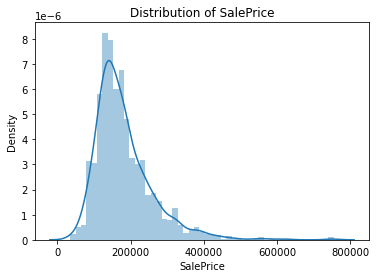

In [175]:
ax = sns.distplot(data["SalePrice"])
ax.set_xlabel("SalePrice")
ax.set_title('Distribution of SalePrice');

SalePrice is fairly normally distributed which is essential for later assumptions on multiple linear regression modelling. It is right-skewed.

C:\Users\Anna\Anaconda3\envs\ironhack\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


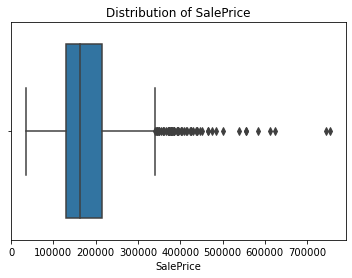

In [176]:
ax = sns.boxplot(data["SalePrice"])
ax.set_xlabel("SalePrice")
ax.set_title('Distribution of SalePrice');

The interquartile range appears to be fairly small and there appear to be many outliers present on the pricier side.

**General exploration of the features**

To get a feel for the data, I randomly chose to look into the relationship between SalePrice and Great Living Area.

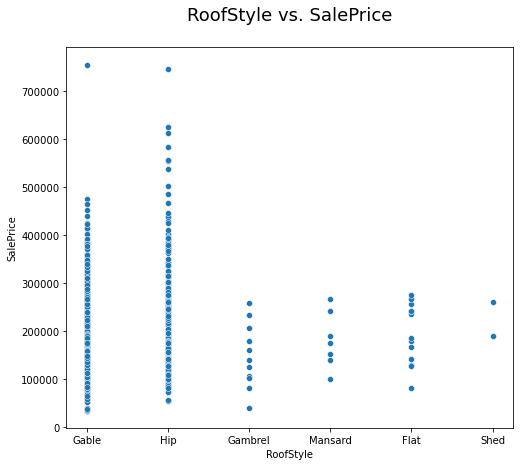

In [177]:
fig = plt.figure(figsize=(8, 7))

sns.scatterplot(data=data3, x=data3.RoofStyle, y=data3.SalePrice)

plt.title('RoofStyle vs. SalePrice\n', size=18);

Gable and Hip as RoofStyle mean higher price. Ok.

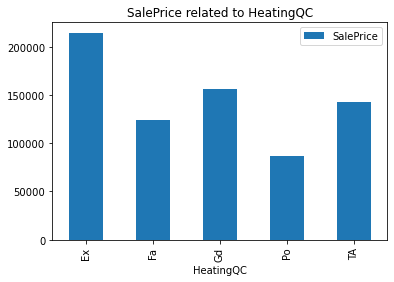

In [178]:
data3[['HeatingQC','SalePrice']].groupby('HeatingQC').mean().plot(kind='bar', title ='SalePrice related to HeatingQC');

Heating Quality also determines Sales Price (also as expected).

Let's do some multiple data series plotting. I create a bar chart that shows Sales Price summed by Sale Condition over time (Month).

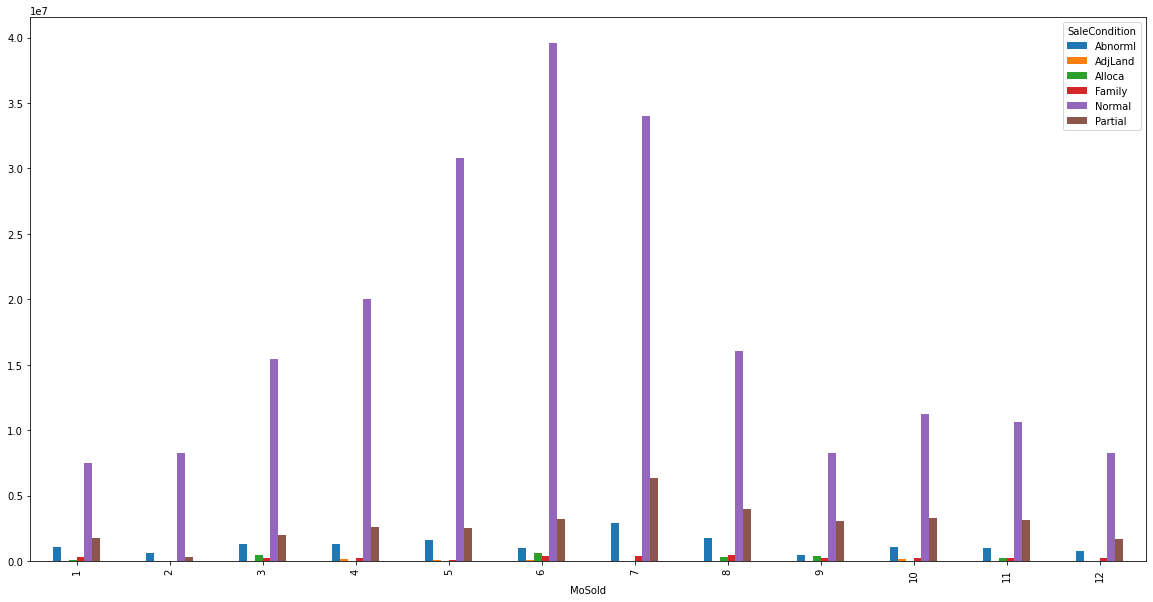

In [179]:
data3.pivot_table(values='SalePrice', index='MoSold', columns='SaleCondition', aggfunc=sum, fill_value=0).plot(kind='bar', figsize=(20,10));

Interesting. Highest sales price is achieved within a "normal" sale condition in the months june and july. According to the dataset.

**In -depth examination of the relationships between the sales price and other features in the dataset**

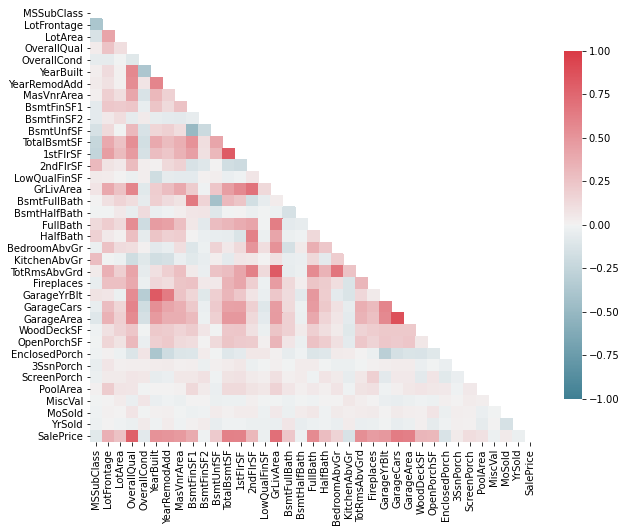

In [180]:
#make correlation matrix
data3_corr = data3.drop('Id', axis=1).corr() #ID column useless as there already is an index column present in the dataset

fig, ax = plt.subplots(figsize=(10, 8))

# make a mask to only show half the table because it would be duplicated
mask = np.triu(np.ones_like(data3_corr, dtype=np.bool))

# choosing colors
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# plot heatmap
sns.heatmap(data3_corr, cmap=cmap, mask=mask, annot=False, fmt=".2f",
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})
# yticks
plt.yticks(rotation=0);

Visibly, there is a very positive tendency in the strength of the linear relationship /correlation between SaluePrice and other variables. The heatmap shows that for instance, OverallQual, GrLivArea, GarageCars and GarageArea appear to have a direct impact on the SalePrice. 

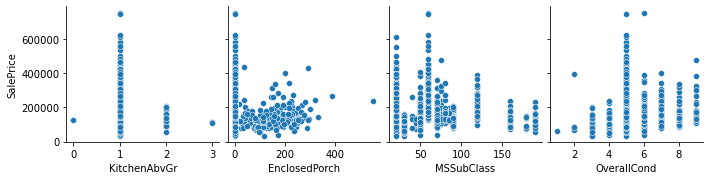

In [181]:
smallest_corr_columns = data3_corr['SalePrice'].sort_values(ascending=False).nsmallest(4).index

sns.pairplot(data=data3, y_vars='SalePrice', x_vars=smallest_corr_columns);

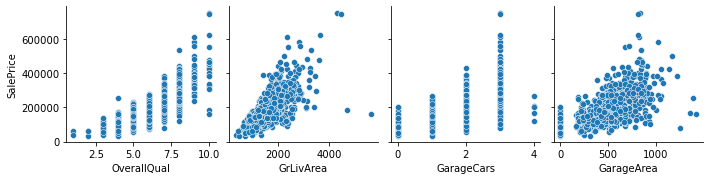

In [182]:
highest_corr_columns = data3_corr['SalePrice'].sort_values(ascending=False).nlargest(5).index


sns.pairplot(data=data3, y_vars='SalePrice', x_vars=highest_corr_columns[1:]);

OverallQual, GrLivArea, GarageCars and GarageArea indeed are the numerical variables with the visibly highest correlation with SalePrice, compared to KitchenAbvGr, EnclsedPorch, MSSubClass and OverallCond as the variables with the lowest.

## Statistical Analysis

**Principal Component Analysis**

 I want to reduce the dimension of the dataset through PCA while still maintaining most of the important information. I extract only the numeric columns and find the principal components. I will limit myself to that number of components which retain 80% of variance of my data.

In [242]:
# set up data set with only numeric columns

numeric_columns = [x for x in data3 if x in data3.select_dtypes(include=['int64','float64'])]
data3_numeric = data3[numeric_columns]
data3_numeric

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [243]:
# standardize

scaler = StandardScaler()
norm_data3 = scaler.fit_transform(data3_numeric)

In [244]:
type(norm_data)

numpy.ndarray

In [245]:
df = pd.DataFrame(norm_data, index=data3_numeric.index, columns=data3_numeric.columns)
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,-1.730865,0.073375,-0.208034,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.510015,0.575425,...,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,0.347273
1,-1.728492,-0.872563,0.409895,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.572835,1.171992,...,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,0.007288
2,-1.726120,0.073375,-0.084449,0.073480,0.651479,-0.517200,0.984752,0.830215,0.322174,0.092907,...,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,0.536154
3,-1.723747,0.309859,-0.414011,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.572835,-0.499274,...,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,-0.515281
4,-1.721374,0.073375,0.574676,0.375148,1.374795,-0.517200,0.951632,0.733308,1.360826,0.463568,...,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,0.869843


In [246]:
#clean the dataset of nan, Inf, and missing cells

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame)
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [283]:
df_clean = clean_dataset(df)
df_clean

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,-1.730865,0.073375,-0.208034,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.510015,0.575425,...,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,0.347273
1,-1.728492,-0.872563,0.409895,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.572835,1.171992,...,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,0.007288
2,-1.726120,0.073375,-0.084449,0.073480,0.651479,-0.517200,0.984752,0.830215,0.322174,0.092907,...,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,0.536154
3,-1.723747,0.309859,-0.414011,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.572835,-0.499274,...,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,-0.515281
4,-1.721374,0.073375,0.574676,0.375148,1.374795,-0.517200,0.951632,0.733308,1.360826,0.463568,...,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,0.869843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.721374,0.073375,-0.331620,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.572835,-0.973018,...,-0.752176,-0.100558,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.620891,-0.614439,-0.074560
1456,1.723747,-0.872563,0.615871,0.266407,-0.071836,0.381743,0.222975,0.151865,0.084610,0.759659,...,2.033231,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,1.645210,0.366161
1457,1.726120,0.309859,-0.166839,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.572835,-0.369871,...,-0.752176,0.201405,-0.359325,-0.116339,-0.270208,-0.068692,4.953112,-0.489110,1.645210,1.077611
1458,1.728492,-0.872563,-0.084449,-0.080160,-0.795151,0.381743,-0.704406,0.539493,-0.572835,-0.865548,...,2.168910,-0.704483,1.473789,-0.116339,-0.270208,-0.068692,-0.087688,-0.859110,1.645210,-0.488523


In [278]:
# use PCA

pca = PCA(0.8) #retain 80% of variance explained by each of the selected components
pca.fit(df_clean)

PCA(n_components=0.8)

In [279]:
pca.explained_variance_ratio_ #returns a vector of the variance explained by each component

array([0.22403177, 0.08612117, 0.07352684, 0.05717632, 0.03975919,
       0.03387228, 0.03330257, 0.03129414, 0.03018712, 0.02979498,
       0.02870549, 0.02742946, 0.02678324, 0.02474684, 0.02300724,
       0.02195504, 0.02139331])

In [280]:
print("Components = ", pca.n_components_ , ";\nTotal explained variance = ", round(pca.explained_variance_ratio_.sum(),5))

Components =  17 ;
Total explained variance =  0.81309


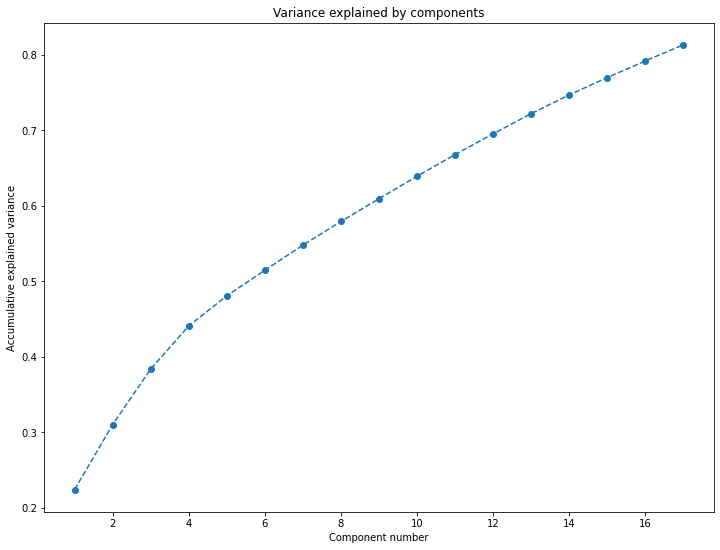

In [281]:
plt.figure(figsize=(12,9))

plt.plot(range(1,18), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle="--")

plt.title("Variance explained by components")
plt.xlabel("Component number")
plt.ylabel("Accumulative explained variance");

My reduced dataset 'df_paca_comp' with 17 components in order to retain 80% of explained variance.

In [287]:
indexes = ['Principal Component' + str(i) for i in np.arange(1,18)]

df_pca_comp = pd.DataFrame(data=pca.components_, columns = df_clean.columns.values, index = indexes)

df_pca_comp

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Principal Component1,-0.011643,-0.017808,0.153851,0.090552,0.292539,-0.090458,0.236528,0.210809,0.201373,0.143479,...,0.128098,0.147991,-0.081036,0.010542,0.029915,0.051925,-0.004766,0.022899,-0.006677,0.326670
Principal Component2,0.016474,0.181293,-0.006284,-0.013107,-0.008047,0.052258,-0.193556,-0.103527,-0.001203,-0.273981,...,-0.038266,0.034724,0.114289,-0.033267,0.041959,0.011719,0.007777,0.030507,-0.035786,-0.009630
Principal Component3,0.010211,-0.187136,0.285460,0.209648,-0.088368,0.143488,-0.317161,-0.258956,0.024273,0.296937,...,0.004827,-0.018267,0.174415,-0.005026,0.147892,0.197937,0.024647,-0.021212,0.001801,0.040635
Principal Component4,-0.011460,-0.329916,0.191958,0.045193,-0.006389,-0.021215,-0.104354,-0.064519,-0.068773,-0.336961,...,-0.121143,-0.013672,0.078886,0.050837,-0.019253,-0.058423,-0.001944,0.039713,-0.026233,-0.040330
Principal Component5,0.115566,0.255198,-0.010350,-0.026152,-0.135107,-0.397178,0.016755,-0.224871,0.077806,0.120284,...,-0.075618,-0.143762,0.072823,-0.054767,-0.305944,0.023854,-0.024082,-0.071554,0.057394,-0.119497
Principal Component6,-0.046715,0.192193,-0.181460,-0.070640,0.003758,-0.121786,-0.026838,-0.187326,0.170692,0.087818,...,-0.182092,0.151095,-0.242037,-0.001289,0.413400,-0.092144,0.008569,0.441070,-0.473878,-0.012527
Principal Component7,-0.370579,-0.081333,0.103288,0.022722,-0.008162,0.044444,-0.014785,-0.022284,0.175254,0.106470,...,0.187369,-0.196756,0.047611,0.410181,-0.483835,-0.120764,-0.035326,0.233461,-0.205489,0.022937
Principal Component8,-0.352497,0.143908,-0.124710,-0.067160,0.059137,0.023829,-0.069366,-0.079932,0.325400,0.048612,...,-0.177798,-0.109479,-0.004674,0.286951,0.252937,-0.209527,-0.001694,-0.384906,0.445830,0.061489
Principal Component9,-0.104487,-0.034686,0.117595,0.000525,0.037377,-0.363092,0.081107,-0.121552,0.067882,-0.003948,...,-0.278260,0.036781,0.343181,0.124915,-0.058771,0.433555,-0.008289,-0.188692,-0.330998,-0.023093
Principal Component10,0.015098,-0.218090,0.299859,0.142622,-0.164400,-0.180959,0.147004,-0.072891,-0.132713,-0.038723,...,-0.238458,0.120553,-0.385492,0.506410,0.179438,-0.064770,0.012680,0.080799,0.129355,-0.089450


**Analysis of Variance**

I will realize some hypothesis testing with some categorical features in the dataset through the ANOVA Test technique. I would like to determine whether Neighborhood, OverallCond and LandSlope have an impact on SalePrice.  

In [183]:
model = ols('SalePrice ~ C(Neighborhood)', data = data3).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Neighborhood),5.023606e+12,24.0,71.784865,1.558600e-225
Residual,4.184305e+12,1435.0,NaN,NaN


In [184]:
model = ols('SalePrice ~ C(OverallCond)', data = data3).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(OverallCond),1.154581e+12,8.0,26.003173,7.962289e-38
Residual,8.053330e+12,1451.0,NaN,NaN


In [185]:
model = ols('SalePrice ~ C(LandSlope)', data = data3).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(LandSlope),2.469217e+10,2.0,1.958817,0.141396
Residual,9.183219e+12,1457.0,NaN,NaN


In [186]:
model = ols('SalePrice ~ C(LandSlope)+C(OverallCond)+C(Neighborhood)', data = data3).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(LandSlope),2.569183e+10,2.0,4.567600,1.053532e-02
C(OverallCond),1.549247e+11,8.0,6.885789,6.422771e-09
C(Neighborhood),3.998083e+12,24.0,59.232984,2.486590e-194
Residual,4.007669e+12,1425.0,NaN,NaN


ValueError: Invalid RGBA argument: 0.12057413815199283

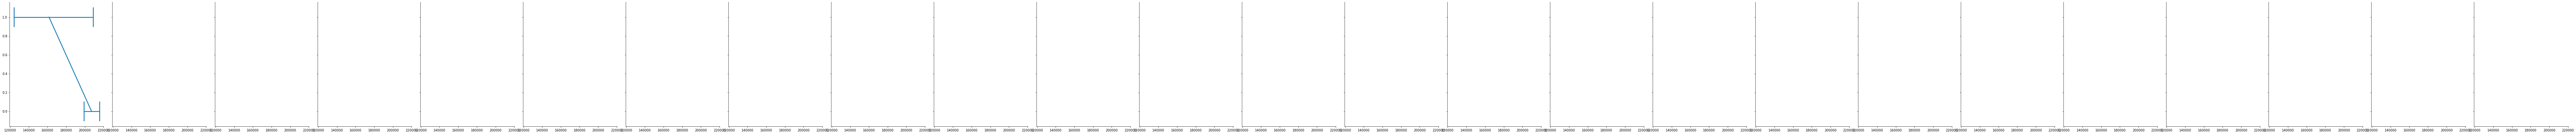

In [187]:
sns.catplot(x="SalePrice", y="LandSlope", hue="OverallCond", col="Neighborhood",
                capsize=.2, palette="YlGnBu_d", height=6, aspect=.75,
                kind="point", data=data3);

**Regression Analysis**

Let's further deepen the previous observation on the variable GrLivArea. I want to know if the relationship between SalePrice and GrLivArea indeed is lineal or not, and therefore if it is appropriate to model it with a linear regression. Is it possible to predict SalePrice with GrLivArea?

In [ ]:
slope, intercept, r_value, p_value, std_err = stats.linregress(data3.SalePrice, data3.GrLivArea)

In [ ]:
#Draw a dispersion diagram (scatter plot) for the data, and fit a regression line

fig = plt.figure(figsize=(8, 7))

sns.scatterplot(data=data3, y=data3.GrLivArea, x=data3.SalePrice)

plt.plot(data3.SalePrice, slope*data3.SalePrice + intercept, color= 'r')


plt.title('GrLivArea vs. SalePrice\n', size=18);

There seem to be two cheap houses with the largest Living Areas. Odd.

In [ ]:
print(p_value, r_value**2)

In [ ]:
X = sm.add_constant(data3.GrLivArea)
Y = data3.SalePrice

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

The r squared is .502 which is moderately high. This means that our model captures approx. 50% of the variation in SalesPrice which can be explained by GrLivArea. The p-value is very small, this means that we will reject the null hypothesis that there is no mutual impact between OverallQual and GrLivArea. There is indeed a relationship between both.

In [ ]:
prediction = model.predict(X)

In [ ]:
X['Prediction'] = prediction

In [ ]:
#model.predict([1,11])
X

In [188]:
predvsreal = pd.concat([X,data3['SalePrice']],axis = 1)
predvsreal

,const,GrLivArea,Prediction,SalePrice
0,1.0,1710,201761.939688,208500
1,1.0,1262,153767.538871,181500
2,1.0,1786,209903.846969,223500
3,1.0,1717,202511.852201,140000
4,1.0,2198,254041.554863,250000
...,...,...,...,...
1455,1.0,1647,195012.727073,175000
1456,1.0,2073,240650.259993,210000
1457,1.0,2340,269254.065837,266500
1458,1.0,1078,134055.552822,142125


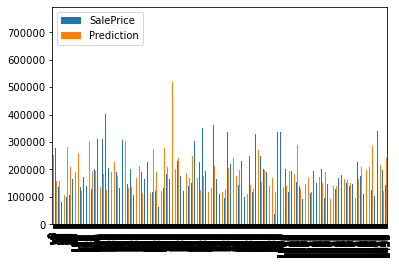

In [189]:
predvsreal[['SalePrice','Prediction']].plot(kind='bar');

## Source:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

https://stackoverflow.com/questions/32857029/python-scikit-learn-pca-explained-variance-ratio-cutoff

https://github.com/corazzon/seaborn-tutorial/blob/master/exercise-Plotting%20a%20three-way%20ANOVA.ipynb